In [25]:
#import required modules

#numpy for linear algebra
import numpy as np
#pandas for data processing, file handling
import pandas as pd
#seaborn for statistical data visualization
import seaborn as sns
#matplotlib for visualization for 2D plotting of array
import matplotlib.pyplot as plt

In [26]:
# First read the consolidated data from the input csv
input_data = pd.read_csv('../mushrooms.csv')
#display the read data
input_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#for information display how many entries  (row) and columns are read from the csv input
input_data.shape

(8124, 23)

In [5]:
#display the information about the columns and their types
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#check if there are any missing values in the data set for each column.  Value 0 shows that no data is missing
input_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

c:\users\vhv\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

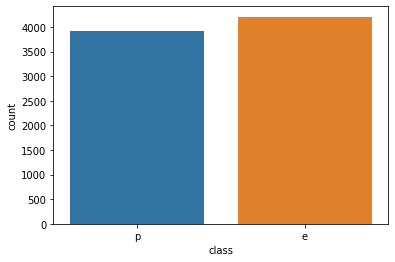

In [7]:
# a simple box plot for the different classes.  As per the raw data analysis, it appears that there are 2 classes, e and p
# lets confirm this with the plot
sns.countplot(input_data["class"])

<Figure size 1008x432 with 0 Axes>

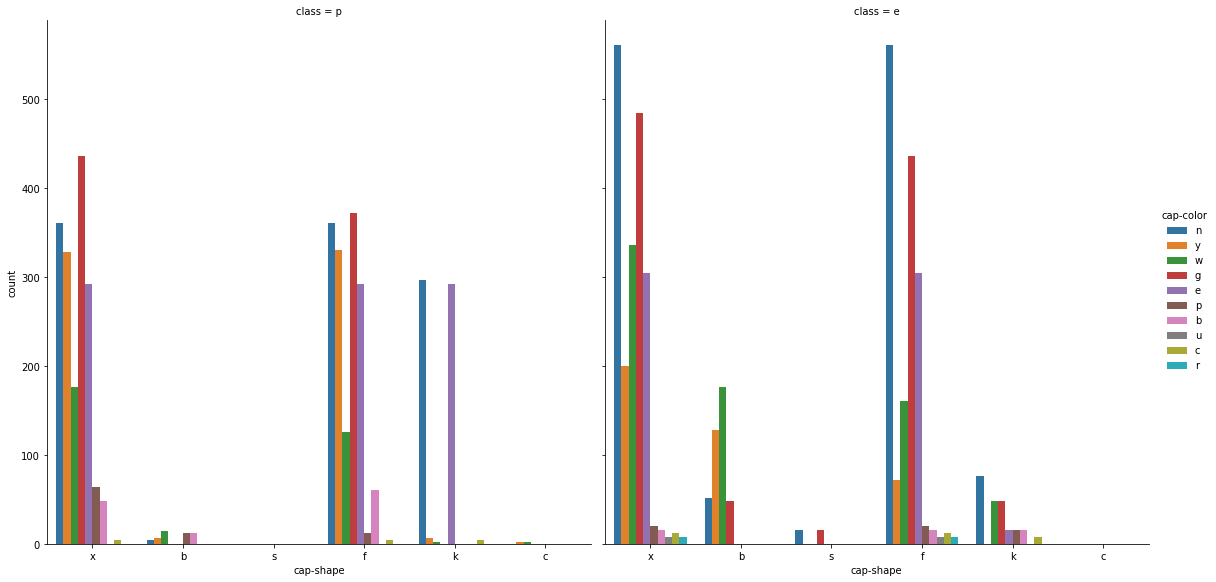

In [8]:
# The entire data analysis should be done for the classification of mushroom since we deal with classes here
# Lets start with categorical data plotting.  This will give us the detail on all categories specified in the data set for each class
plt.figure(figsize=(14,6))
return_plot = sns.catplot(x ="cap-shape", hue="cap-color", data=input_data, col="class", kind="count", height=8)

<Figure size 1008x432 with 0 Axes>

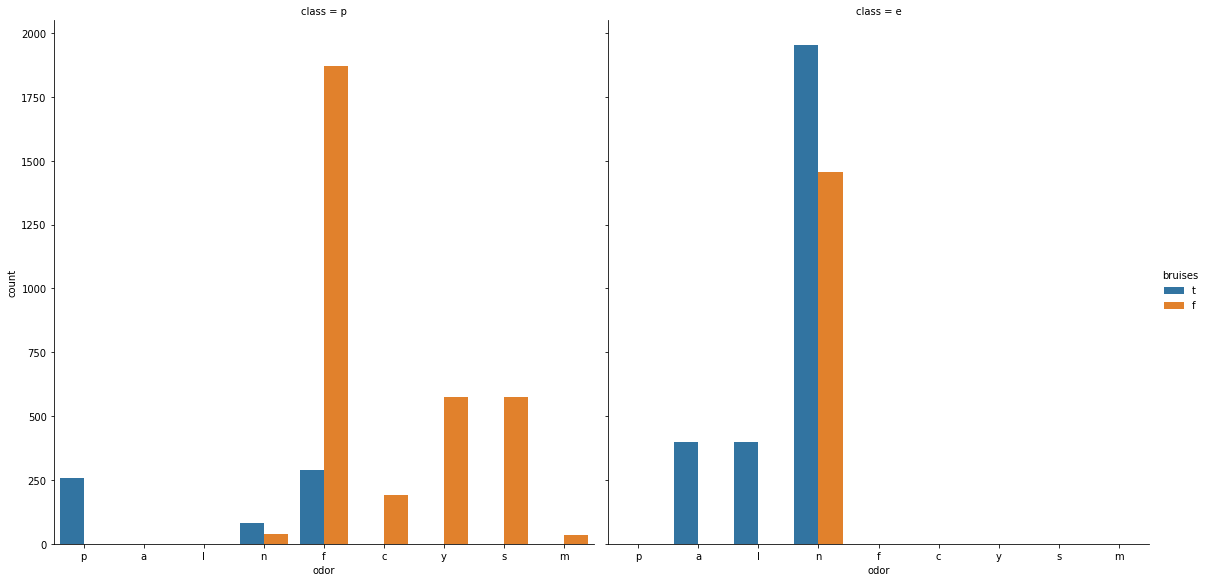

In [29]:
plt.figure(figsize=(14,6))
k = sns.catplot(x ="odor", hue="bruises", data=data, col="class", kind="count", height=8)

In [9]:
#Lets first do the encoding to enable computation of transform
from sklearn.preprocessing import LabelEncoder
#as a result I expect a numerical representation for each category post applying transformation
la = LabelEncoder()

#considering the classes and the categories we have, fit transform fits well
transform_data = input_data.apply(la.fit_transform)
transform_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [40]:
#For further analysis, the class column can be dropped since we already know that there are only 2 classes p and e
x_axis = transform_data.drop(["class"], axis=1)
y_axis = transform_data["class"]

In [44]:
#lets split the data array into 2 subsets (required for each axis)
from sklearn.model_selection import train_test_split
x_axis_train, x_axis_test, y_axis_train, y_axis_test = train_test_split(x_axis, y_axis, random_state=0, test_size=0.25)

In [54]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0, max_depth=5)
classifier.fit(x_axis_train, y_axis_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [55]:
#Lets get the coefficient of determination (R2) of the prediction
print(classifier.score(x_axis_train, y_axis_train))

0.9783357951747907


In [50]:
#Lets predict the labels of the data values on the basis of the fit transformation that we tried above
y_axis_predict = classifier.predict(x_axis_test)

In [51]:
#display the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_axis_predict)

0.982274741506647

In [57]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(x_axis_train,y_axis_train)
print(rfc.score(x_axis_train,y_axis_train))

0.9906450024618415


In [61]:
y_pred_rfc = rfc.predict(x_axis_test)
accuracy_score(y_axis_test, y_pred_rfc)

0.9926144756277696

In [43]:
print('Comparing accuracy results between Decision Tree and Random Forest, Random Forest is the better model to follow since it shows 0.99 score against 0.98 in Decision tree')

Comparing accuracy results between Decision Tree and Random Forest, Random Forest is the better model to follow since it shows 0.99 score against 0.98 in Decision tree
